## Sentiment Analysis on Amazon Fine Foods

In [ ]:
!pip install requests

In [ ]:
!pip install tqdm

**Data Preprocessing**

In [ ]:
import csv
import requests
import os
import gzip
import logging
from tqdm import tqdm
import time

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def download_file(url, local_path):
    """Download a file from a URL and save it locally."""
    try:
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        with open(local_path, 'wb') as file:
            file.write(response.content)
        logging.info(f"Downloaded file to {local_path}")
    except Exception as e:
        logging.error(f"Failed to download file: {e}")
        raise

def convert_txt_to_csv(input_file, output_file):
    """Convert the downloaded text file to a CSV format."""
    with open(input_file, 'r', encoding='ISO-8859-1') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(['productId', 'userId', 'profileName', 'helpfulness', 'score', 'time', 'summary', 'text'])

        product_data = {}
        in_review_text = False

        for line in tqdm(infile, desc="Processing lines"):
            line = line.strip()

            if not line:
                if product_data:
                    writer.writerow([
                        product_data.get('product/productId', ''),
                        product_data.get('review/userId', ''),
                        product_data.get('review/profileName', ''),
                        product_data.get('review/helpfulness', ''),
                        product_data.get('review/score', ''),
                        product_data.get('review/time', ''),
                        product_data.get('review/summary', ''),
                        product_data.get('review/text', '')
                    ])
                    product_data = {}
                    in_review_text = False
            else:
                if in_review_text:
                    product_data['review/text'] += ' ' + line.strip()
                else:
                    if ': ' in line:
                        key, value = line.split(': ', 1)
                        product_data[key.strip()] = value.strip()
                        if key == 'review/text':
                            in_review_text = True
                    else:
                        logging.warning(f"Skipping malformed line: {line}")

        if product_data:
            writer.writerow([
                product_data.get('product/productId', ''),
                product_data.get('review/userId', ''),
                product_data.get('review/profileName', ''),
                product_data.get('review/helpfulness', ''),
                product_data.get('review/score', ''),
                product_data.get('review/time', ''),
                product_data.get('review/summary', ''),
                product_data.get('review/text', '')
            ])

# Define URLs and file paths
url = "https://snap.stanford.edu/data/finefoods.txt.gz"
downloaded_file = "finefoods.txt.gz"
uncompressed_file = f"finefoods_{int(time.time())}.txt"
output_file = "finefoods.csv"

# Step 1: Download the file
download_file(url, downloaded_file)

# Step 2: Uncompress the file
if os.path.exists(uncompressed_file):
    logging.warning(f"{uncompressed_file} already exists. Overwriting...")
    os.remove(uncompressed_file)

with gzip.open(downloaded_file, 'rb') as gz_file:
    with open(uncompressed_file, 'wb') as out_file:
        out_file.write(gz_file.read())
logging.info(f"Uncompressed file saved to: {uncompressed_file}")

# Step 3: Convert the text file to CSV
convert_txt_to_csv(uncompressed_file, output_file)
logging.info(f"CSV file saved at: {output_file}")

# Clean up downloaded file
if os.path.exists(downloaded_file):
    os.remove(downloaded_file)
    logging.info(f"Removed temporary file: {downloaded_file}")

Processing lines: 843624it [00:08, 64107.94it/s]WARNING:root:Skipping malformed line: 88 years old. ...
Processing lines: 1592947it [00:17, 83063.18it/s]WARNING:root:Skipping malformed line: ...creative powers b...
Processing lines: 1709246it [00:19, 53363.22it/s]WARNING:root:Skipping malformed line: School Princi...
Processing lines: 2548857it [00:26, 151466.15it/s]WARNING:root:Skipping malformed line: School Princi...
Processing lines: 3144156it [00:28, 386738.15it/s]WARNING:root:Skipping malformed line: I am a voracious reader/li...
Processing lines: 3377601it [00:29, 386287.23it/s]WARNING:root:Skipping malformed line: School Princi...
Processing lines: 4843879it [00:35, 212655.10it/s]WARNING:root:Skipping malformed line: ...creative powers b...
Processing lines: 5116093it [00:36, 139229.24it/s]


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df_fine_foods = pd.read_csv(output_file)

# Display the first few rows of the DataFrame
print(df_fine_foods.head())

    productId          userId                      profileName helpfulness  \
0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian         1/1   
1  B00813GRG4  A1D87F6ZCVE5NK                           dll pa         0/0   
2  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"         1/1   
3  B000UA0QIQ  A395BORC6FGVXV                             Karl         3/3   
4  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"         0/0   

   score        time                summary  \
0    5.0  1303862400  Good Quality Dog Food   
1    1.0  1346976000      Not as Advertised   
2    4.0  1219017600  "Delight" says it all   
3    2.0  1307923200         Cough Medicine   
4    5.0  1350777600            Great taffy   

                                                text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for th

In [ ]:
df_fine_foods

,productId,userId,profileName,helpfulness,score,time,summary,text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0/0,5.0,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0/0,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1/1,5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
# Display basic statistics of the DataFrame
statistics = df_fine_foods.describe(include='all')  # Include='all' to get stats for categorical columns as well
print(statistics)

         productId          userId       profileName helpfulness  \
count       568454          568454            568428      568454   
unique       74258          256059            218415        1571   
top     B007JFMH8M  A3OXHLG6DIBRW8  C. F. Hill "CFH"         0/0   
freq           913             448               451      270052   
mean           NaN             NaN               NaN         NaN   
std            NaN             NaN               NaN         NaN   
min            NaN             NaN               NaN         NaN   
25%            NaN             NaN               NaN         NaN   
50%            NaN             NaN               NaN         NaN   
75%            NaN             NaN               NaN         NaN   
max            NaN             NaN               NaN         NaN   

                score          time     summary  \
count   568454.000000  5.684540e+05      568427   
unique            NaN           NaN      295742   
top               NaN         

In [ ]:
# Convert the 'time' column from Unix time to a readable date format
df_fine_foods['time'] = pd.to_datetime(df_fine_foods['time'], unit='s')

# Display the DataFrame with the converted time
print(df_fine_foods[['time']])

             time
0      2011-04-27
1      2012-09-07
2      2008-08-18
3      2011-06-13
4      2012-10-21
...           ...
568449 2011-03-09
568450 2012-03-09
568451 2012-02-21
568452 2012-03-13
568453 2012-05-31

[568454 rows x 1 columns]


In [ ]:
df_fine_foods

,productId,userId,profileName,helpfulness,score,time,summary,text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0/0,5.0,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0/0,2.0,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1/1,5.0,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
df_fine_foods = df_fine_foods.drop_duplicates()

In [ ]:
df_fine_foods

,productId,userId,profileName,helpfulness,score,time,summary,text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0/0,5.0,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0/0,2.0,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1/1,5.0,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
missing_summary = df_fine_foods.isnull().sum()

In [ ]:
missing_summary

,0
productId,0
userId,0
profileName,26
helpfulness,0
score,0
time,0
summary,27
text,0


In [ ]:
df_fine_foods.loc[df_fine_foods['profileName'].isnull(), 'profileName'] = 'Unknown'

In [ ]:
mode_summary = df_fine_foods['summary'].mode().iloc[0]
df_fine_foods.loc[df_fine_foods['summary'].isnull(), 'summary'] = mode_summary

In [ ]:
missing_values_after = df_fine_foods.isnull().sum()
print(missing_values_after)

productId      0
userId         0
profileName    0
helpfulness    0
score          0
time           0
summary        0
text           0
dtype: int64


# Exploratory Data Analysis

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

Distribution of Score in the data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-136-3ca93dbece62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fine_foods, x='score', palette='viridis')


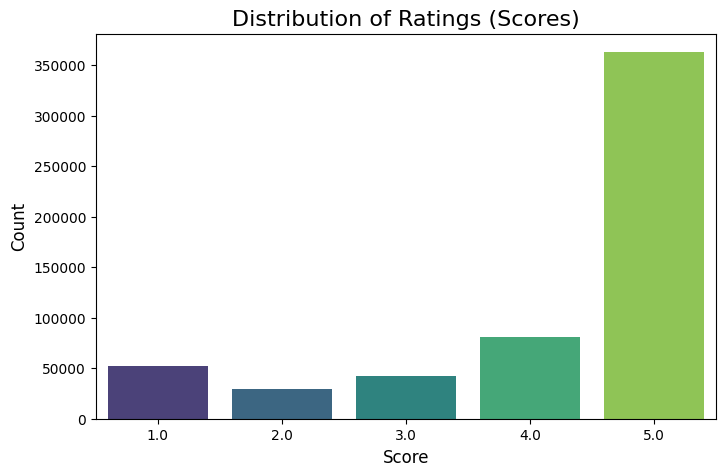

In [ ]:
# Plotting the distribution of scores
plt.figure(figsize=(8, 5))
sns.countplot(data=df_fine_foods, x='score', palette='viridis')
plt.title('Distribution of Ratings (Scores)', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
df_fine_foods['score'].value_counts()

,count
score,
5.0,362936
4.0,80627
1.0,52231
3.0,42614
2.0,29765


The distribution of the Target Variable(Score) looks imbalanced. We might consider applying SMOTE or other balancing techniques if the model performance is not good.

In [ ]:
# Count the number of reviews per score
score_counts = df_fine_foods['score'].value_counts()

target_reviews = 50000

# Oversample the dataset by taking `target_reviews` samples from each score category
df_fine_foods = df_fine_foods.groupby('score').apply(lambda x: x.sample(target_reviews, replace=True)).reset_index(drop=True)

# Check the class distribution after oversampling
df_fine_foods['score'].value_counts()

<ipython-input-138-c52cd28f39b0>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_fine_foods = df_fine_foods.groupby('score').apply(lambda x: x.sample(target_reviews, replace=True)).reset_index(drop=True)


,count
score,
1.0,50000
2.0,50000
3.0,50000
4.0,50000
5.0,50000


In [ ]:
df_fine_foods['score'].value_counts()

,count
score,
1.0,50000
2.0,50000
3.0,50000
4.0,50000
5.0,50000


We also want to add a Sentiment column in the dataframe which will show the sentiment of the Reviews based on the score.

In [ ]:
# Define a function to classify sentiment based on the score
def classify_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    elif 2 >= score <= 1:
        return 'Negative'

# Add a new column 'Sentiment' to the dataframe
df_fine_foods['Sentiment'] = df_fine_foods['score'].apply(classify_sentiment)

# Display the first few rows of the dataframe to verify
df_fine_foods

,productId,userId,profileName,helpfulness,score,time,summary,text,Sentiment
0,B003CK2BQG,A36AY8J5I9S15C,"Diane ""Design Student""",1/3,1.0,2009-03-15,Not that great,I love the Stash brand tea. I love the flavors...,Negative
1,B004H3N2LU,A2KJHA97J1JOO9,Andrew Chua,3/3,1.0,2011-02-05,Worst coffee ever! No Filter,"I was surprised at how light each cup was, the...",Negative
2,B0011MU2CC,A3EXK2A6D25TKR,LuvMyDogs,2/2,1.0,2011-06-23,Old product,The tablets had discolored from age. These ta...,Negative
3,B002GJ9JY6,A1IXMFH2Z6FJA6,"- ""-""",5/27,1.0,2012-02-25,Impossible To Spread On Bread,I feel the Tuscan Milk jokes starting all over...,Negative
4,B0015CMQNG,A3JX9A0HRPLFVC,Melongsworth,0/1,1.0,2012-06-12,Stale at best,"I am so disappointed, the biscotti is stale an...",Negative
...,...,...,...,...,...,...,...,...,...
249995,B003Y3IGS8,A1XI2MEBZEULR0,Favini,0/0,5.0,2012-04-13,Ya Mon... Jamaica in Minnesota,My husband and I go to Jamaica about every 9 m...,Positive
249996,B001MJWTJS,A38NYXRK8P652P,MzStar,0/0,5.0,2011-08-06,Tasty and effective,I drink this tea whenever I want to give my mi...,Positive
249997,B000K8ID2E,A3X9PMCT65Q8Y,"Dr. SDM ""SDM""",1/1,5.0,2011-04-04,It works....grass is growing and a hit with kitty,I didnt read instructions until after added se...,Positive
249998,B001M08YP0,A2KUUIJ52MWDAS,K. B. Fenner,6/7,5.0,2010-11-29,"I'm a gum addict, and this is my drug of choice",I chew an inordinate amount of gum-- I have a ...,Positive


We want to see how many people find the reviews are helpful. We already have a column in the data called Helpfulness. We would find the ratio of helpfulness from this column. We will add the helpfulness ration column at the end of the dataframe.

In [ ]:
# Splitting 'helpfulness' into numerator and denominator
df_fine_foods[['helpfulness_numerator', 'helpfulness_denominator']] = (
    df_fine_foods['helpfulness'].str.split('/', expand=True).astype(float)
)

# Calculating the helpfulness ratio
df_fine_foods['helpfulness_ratio'] = (
    df_fine_foods['helpfulness_numerator'] / df_fine_foods['helpfulness_denominator']
).fillna(0)

# Display the updated DataFrame
df_fine_foods.head()

,productId,userId,profileName,helpfulness,score,time,summary,text,Sentiment,helpfulness_numerator,helpfulness_denominator,helpfulness_ratio
0,B003CK2BQG,A36AY8J5I9S15C,"Diane ""Design Student""",1/3,1.0,2009-03-15,Not that great,I love the Stash brand tea. I love the flavors...,Negative,1.0,3.0,0.333333
1,B004H3N2LU,A2KJHA97J1JOO9,Andrew Chua,3/3,1.0,2011-02-05,Worst coffee ever! No Filter,"I was surprised at how light each cup was, the...",Negative,3.0,3.0,1.000000
2,B0011MU2CC,A3EXK2A6D25TKR,LuvMyDogs,2/2,1.0,2011-06-23,Old product,The tablets had discolored from age. These ta...,Negative,2.0,2.0,1.000000
3,B002GJ9JY6,A1IXMFH2Z6FJA6,"- ""-""",5/27,1.0,2012-02-25,Impossible To Spread On Bread,I feel the Tuscan Milk jokes starting all over...,Negative,5.0,27.0,0.185185
4,B0015CMQNG,A3JX9A0HRPLFVC,Melongsworth,0/1,1.0,2012-06-12,Stale at best,"I am so disappointed, the biscotti is stale an...",Negative,0.0,1.0,0.000000


Now, we want to analyze on the helpfulness ration column. If the ratio is null, it is classified as 'Useless', if the ratio is greater than 0.75, we will classify it as >75% useful, and if the ratio is between 0.25 and 0.75, we will classify as 25%-75% and so on.

In [ ]:
def categorize_helpfulness(ratio):
    if pd.isna(ratio) or ratio == 0:
        return 'useless'
    elif ratio > 0.75:
        return '>75%'
    elif 0.25 <= ratio <= 0.75:
        return '25-75%'
    else:
        return '<25%'

df_fine_foods['usefulness'] = df_fine_foods['helpfulness_ratio'].apply(categorize_helpfulness)

<ipython-input-143-ca5b2ef0701b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='usefulness', data=df_fine_foods, order=['useless', '>75%', '25-75%', '<25%'], palette='rocket_r')


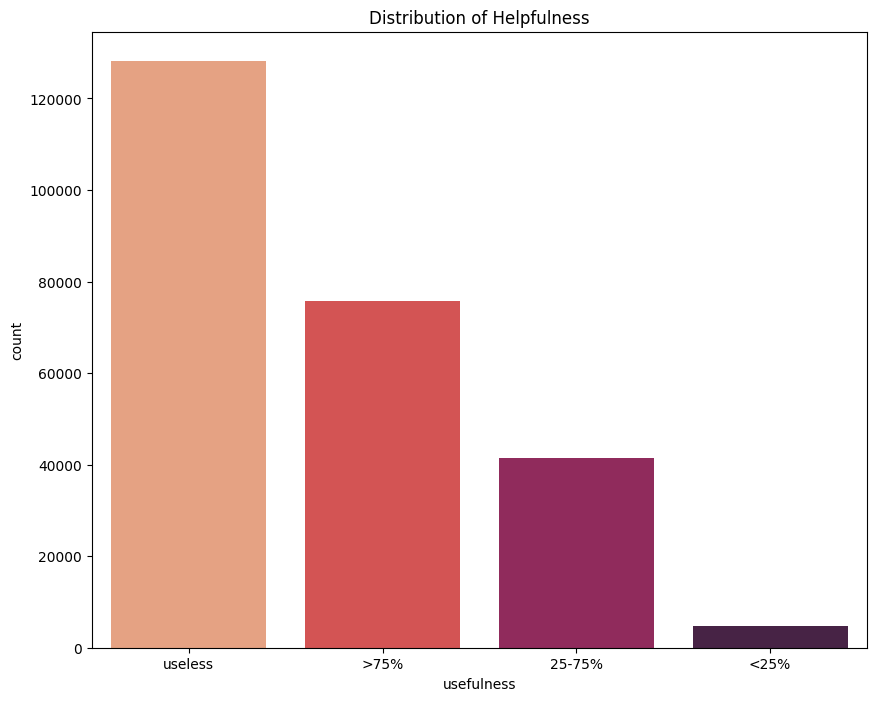

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='usefulness', data=df_fine_foods, order=['useless', '>75%', '25-75%', '<25%'], palette='rocket_r')
plt.title('Distribution of Helpfulness')
plt.show()

Next, we analyze how are the helpful are the reviews by Score. It seems like not every rating is helpful for users. People have reviewed the ratings but they do not find it very helpful always.

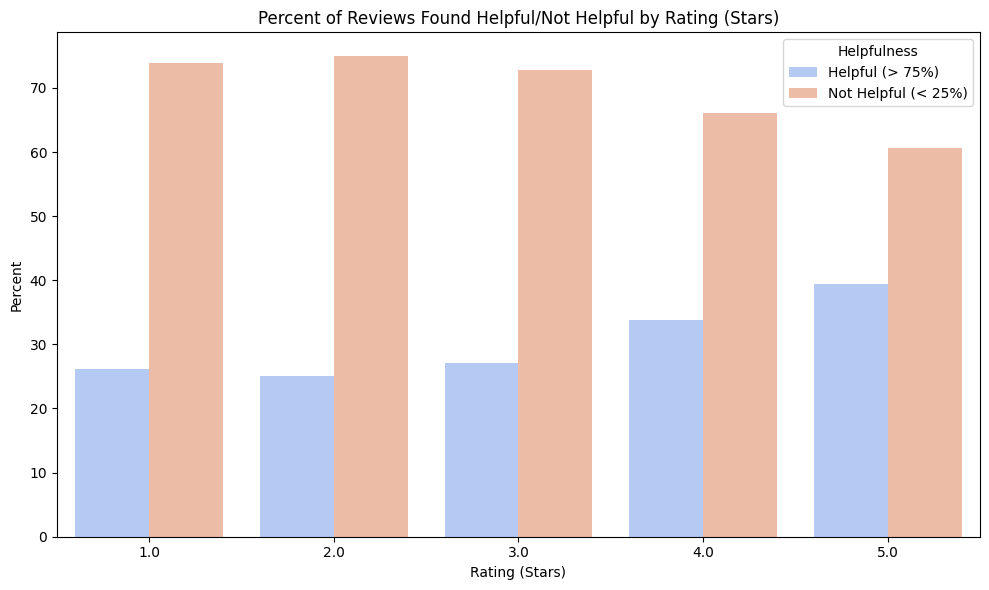

In [ ]:
# Create a column to group helpfulness
df_fine_foods['Helpfulness Category'] = df_fine_foods['usefulness'].apply(lambda x: 'Helpful (> 75%)' if x == '>75%' else 'Not Helpful (< 25%)')

# Group data to calculate percentages
helpfulness_summary = df_fine_foods.groupby(['score', 'Helpfulness Category']).size().reset_index(name='Count')
helpfulness_summary['Percent'] = helpfulness_summary.groupby('score')['Count'].transform(lambda x: x / x.sum() * 100)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='score',
    y='Percent',
    hue='Helpfulness Category',
    data=helpfulness_summary,
    palette='coolwarm'
)

plt.title('Percent of Reviews Found Helpful/Not Helpful by Rating (Stars)')
plt.xlabel('Rating (Stars)')
plt.ylabel('Percent')
plt.legend(title='Helpfulness')
plt.tight_layout()
plt.show()

Word cloud for Positive Sentiment

In [ ]:
!pip install wordcloud

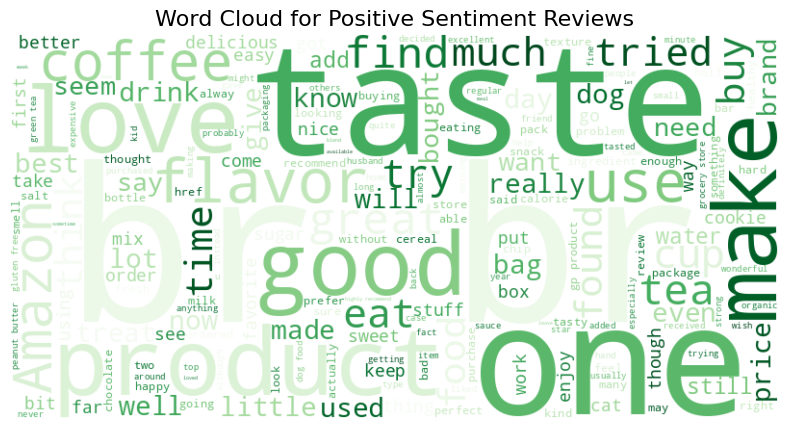

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataset for positive sentiment reviews
positive_reviews = df_fine_foods[df_fine_foods['Sentiment'] == 'Positive']['text']

# Combine all reviews into a single string
positive_text = " ".join(review for review in positive_reviews)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=200
).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Positive Sentiment Reviews', fontsize=16)
plt.show()

We see that, in the positive sentiment word cloud, we have words like 'best', 'favorite','good' etc. Let's examine the word cloud for negative sentiment now.

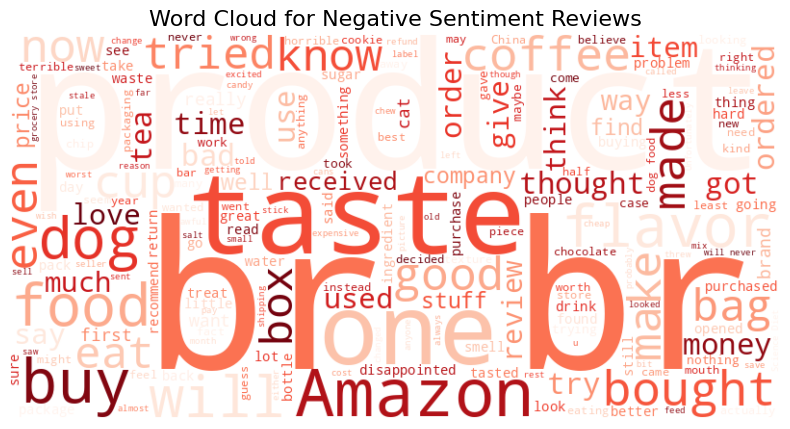

In [ ]:
# Filter the dataset for negative sentiment reviews
negative_reviews = df_fine_foods[df_fine_foods['Sentiment'] == 'Negative']['text']

# Combine all reviews into a single string
negative_text = " ".join(review for review in negative_reviews)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=200
).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Negative Sentiment Reviews', fontsize=16)
plt.show()

In the negative sentiment, we see words like 'disappointed', 'refund','horrible' etc.

We also want to see if the word count in the review text have any impact on the sentiment or helpfulness of the review. For that we will create an word_count column in the dataframe.

In [ ]:
# Define the word_count column
df_fine_foods['word_count'] = df_fine_foods['text'].apply(lambda x: len(str(x).split()))

# Display the first few rows to verify
print(df_fine_foods[['text', 'word_count']].head())

                                                text  word_count
0  I love the Stash brand tea. I love the flavors...          72
1  I was surprised at how light each cup was, the...          93
2  The tablets had discolored from age.  These ta...          22
3  I feel the Tuscan Milk jokes starting all over...         204
4  I am so disappointed, the biscotti is stale an...          25


<ipython-input-149-b5b14b28ba9f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


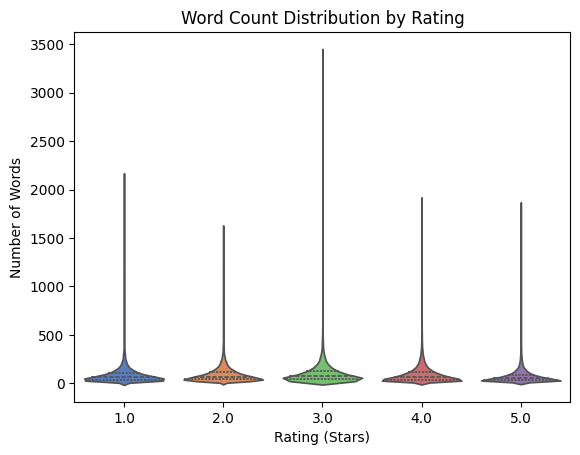

In [ ]:
sns.violinplot(
    x='score',
    y='word_count',
    data=df_fine_foods,
    palette='muted',
    inner='quartile'
)
plt.title('Word Count Distribution by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Words')
plt.show()

As we can see from the plot, the number of words in a review does not seem to be strongly influenced by the rating (1 to 5 stars).

Next, we would want to see if the helpfulness feature has any relation with word count.

<ipython-input-150-3c83eeec8684>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


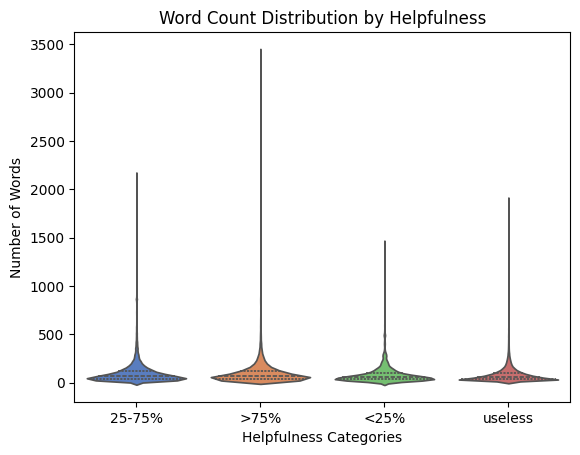

In [ ]:
sns.violinplot(
    x='usefulness',
    y='word_count',
    data=df_fine_foods,
    palette='muted',
    inner='quartile'
)
plt.title('Word Count Distribution by Helpfulness')
plt.xlabel('Helpfulness Categories')
plt.ylabel('Number of Words')
plt.show()

We see that, reviews in the >75% helpfulness category show a higher likelihood of having longer word counts compared to "useless" or <25% categories.

Now, we will show the sentiment of the top 10 products with time. It seems the number of reviews has steadily increased from 2008 to 2012, showing that more people are sharing their opinions. Neutral and negative reviews stayed at lower and more stable levels compared to positive ones. The number of reviews before 2008 are negligible.

<ipython-input-151-fc3448644ee9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_reviews['YearMonth'] = top_products_reviews['Date'].dt.to_period('M')


<Figure size 1600x800 with 0 Axes>

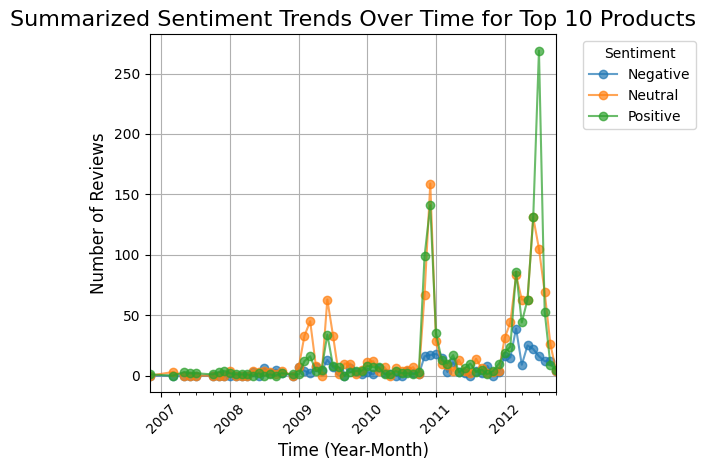

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Time' to a readable datetime format
df_fine_foods['Date'] = pd.to_datetime(df_fine_foods['time'], unit='s')

# Get the top 10 products with the most reviews
top_products = df_fine_foods['productId'].value_counts().head(10).index

# Filter the dataset for only the top 10 products
top_products_reviews = df_fine_foods[df_fine_foods['productId'].isin(top_products)]

# Group by YearMonth and Sentiment for the summarized view
top_products_reviews['YearMonth'] = top_products_reviews['Date'].dt.to_period('M')
summarized_trend_data = top_products_reviews.groupby(['YearMonth', 'Sentiment']).size().reset_index(name='ReviewCount')

# Pivot the data for easier plotting
summarized_trend_pivot = summarized_trend_data.pivot(index='YearMonth', columns='Sentiment', values='ReviewCount').fillna(0)

# Plot the summarized trend
plt.figure(figsize=(16, 8))
summarized_trend_pivot.plot(kind='line', marker='o', alpha=0.7)

plt.title('Summarized Sentiment Trends Over Time for Top 10 Products', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install scipy

Next. we see the impact of frequent reviewers on the food rating. The similarity between the two distributions indicates that frequent reviewers and not frequent reviewers have similar rating behavior.

Average Ratings:
ReviewerCategory
Frequent        3.047211
Not Frequent    2.999033
Name: score, dtype: float64


<ipython-input-153-d24386ba92e1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ReviewerCategory', y='score', data=df_fine_foods, palette='coolwarm')


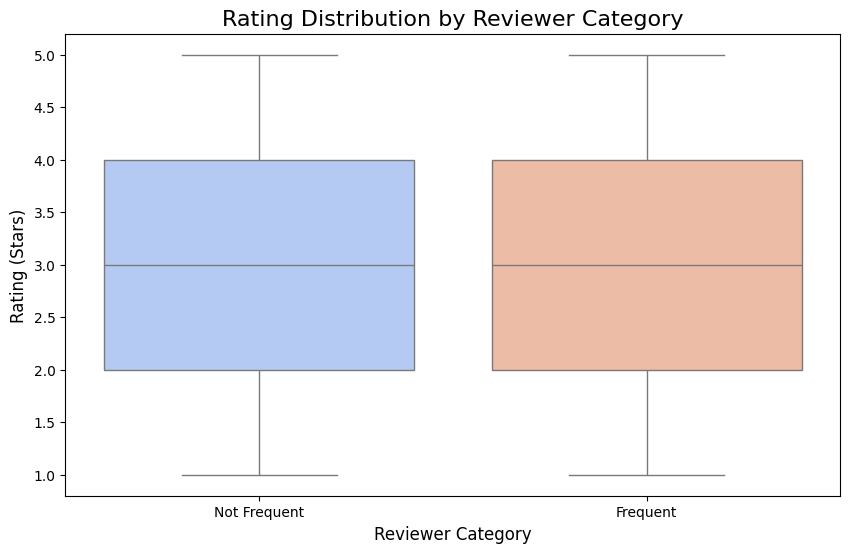

T-statistic: 2.8630132058677806, P-value: 0.00421272374309292
The difference in ratings between Frequent and Not Frequent reviewers is statistically significant.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Step 1: Classify reviewers as 'Frequent' or 'Not Frequent'
reviewer_counts = df_fine_foods['userId'].value_counts()
df_fine_foods['ReviewerCategory'] = df_fine_foods['userId'].map(
    lambda x: 'Frequent' if reviewer_counts[x] > 50 else 'Not Frequent'
)

# Step 2: Calculate average rating for each group
average_ratings = df_fine_foods.groupby('ReviewerCategory')['score'].mean()
print("Average Ratings:")
print(average_ratings)

# Step 3: Visualize rating distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='ReviewerCategory', y='score', data=df_fine_foods, palette='coolwarm')
plt.title('Rating Distribution by Reviewer Category', fontsize=16)
plt.xlabel('Reviewer Category', fontsize=12)
plt.ylabel('Rating (Stars)', fontsize=12)
plt.show()

# Step 4: Statistical test
frequent_ratings = df_fine_foods[df_fine_foods['ReviewerCategory'] == 'Frequent']['score']
not_frequent_ratings = df_fine_foods[df_fine_foods['ReviewerCategory'] == 'Not Frequent']['score']

# Perform t-test
t_stat, p_value = ttest_ind(frequent_ratings, not_frequent_ratings, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in ratings between Frequent and Not Frequent reviewers is statistically significant.")
else:
    print("There is no significant difference in ratings between Frequent and Not Frequent reviewers.")

Average Ratings:
ReviewerCategory
Frequent        3.047211
Not Frequent    2.999033
Name: score, dtype: float64


<ipython-input-154-d24386ba92e1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ReviewerCategory', y='score', data=df_fine_foods, palette='coolwarm')


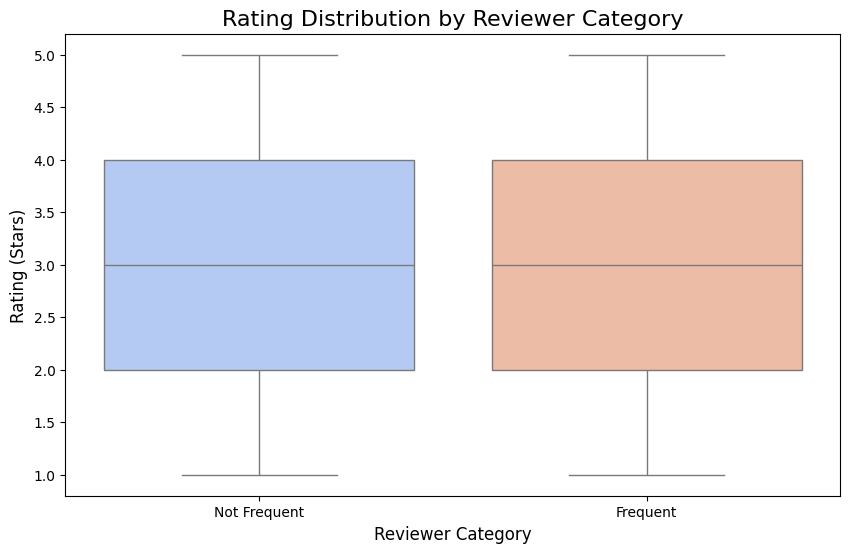

T-statistic: 2.8630132058677806, P-value: 0.00421272374309292
The difference in ratings between Frequent and Not Frequent reviewers is statistically significant.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Step 1: Classify reviewers as 'Frequent' or 'Not Frequent'
reviewer_counts = df_fine_foods['userId'].value_counts()
df_fine_foods['ReviewerCategory'] = df_fine_foods['userId'].map(
    lambda x: 'Frequent' if reviewer_counts[x] > 50 else 'Not Frequent'
)

# Step 2: Calculate average rating for each group
average_ratings = df_fine_foods.groupby('ReviewerCategory')['score'].mean()
print("Average Ratings:")
print(average_ratings)

# Step 3: Visualize rating distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='ReviewerCategory', y='score', data=df_fine_foods, palette='coolwarm')
plt.title('Rating Distribution by Reviewer Category', fontsize=16)
plt.xlabel('Reviewer Category', fontsize=12)
plt.ylabel('Rating (Stars)', fontsize=12)
plt.show()

# Step 4: Statistical test
frequent_ratings = df_fine_foods[df_fine_foods['ReviewerCategory'] == 'Frequent']['score']
not_frequent_ratings = df_fine_foods[df_fine_foods['ReviewerCategory'] == 'Not Frequent']['score']

# Perform t-test
t_stat, p_value = ttest_ind(frequent_ratings, not_frequent_ratings, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in ratings between Frequent and Not Frequent reviewers is statistically significant.")
else:
    print("There is no significant difference in ratings between Frequent and Not Frequent reviewers.")

Here we see, the word count by frequency of reviewers. But there is not significant impact with the word count and frequent/non frequent reviewers. Both groups usually write reviews of similar lengths, but some people in each group write very long reviews, over 3,000 words. Frequent reviewers have a bit more variation in the length of their reviews, but most reviews are short and similar in size.

<ipython-input-155-976e0850ac93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ReviewerCategory', y='word_count', data=df_fine_foods, palette='Set3')


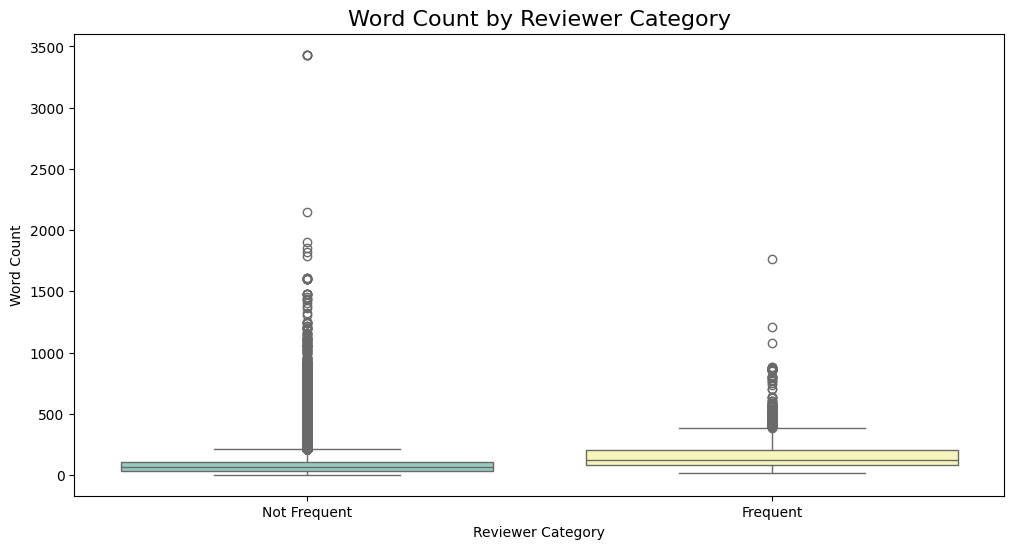

In [ ]:
# 3. Word Count by Reviewer Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='ReviewerCategory', y='word_count', data=df_fine_foods, palette='Set3')
plt.title('Word Count by Reviewer Category', fontsize=16)
plt.xlabel('Reviewer Category')
plt.ylabel('Word Count')
plt.show()

# Remove Stop words, Lemmatization

In [ ]:
!pip install nltk

In [ ]:
df_fine_foods

,productId,userId,profileName,helpfulness,score,time,summary,text,Sentiment,helpfulness_numerator,helpfulness_denominator,helpfulness_ratio,usefulness,Helpfulness Category,word_count,Date,ReviewerCategory
0,B003CK2BQG,A36AY8J5I9S15C,"Diane ""Design Student""",1/3,1.0,2009-03-15,Not that great,I love the Stash brand tea. I love the flavors...,Negative,1.0,3.0,0.333333,25-75%,Not Helpful (< 25%),72,2009-03-15,Not Frequent
1,B004H3N2LU,A2KJHA97J1JOO9,Andrew Chua,3/3,1.0,2011-02-05,Worst coffee ever! No Filter,"I was surprised at how light each cup was, the...",Negative,3.0,3.0,1.000000,>75%,Helpful (> 75%),93,2011-02-05,Not Frequent
2,B0011MU2CC,A3EXK2A6D25TKR,LuvMyDogs,2/2,1.0,2011-06-23,Old product,The tablets had discolored from age. These ta...,Negative,2.0,2.0,1.000000,>75%,Helpful (> 75%),22,2011-06-23,Not Frequent
3,B002GJ9JY6,A1IXMFH2Z6FJA6,"- ""-""",5/27,1.0,2012-02-25,Impossible To Spread On Bread,I feel the Tuscan Milk jokes starting all over...,Negative,5.0,27.0,0.185185,<25%,Not Helpful (< 25%),204,2012-02-25,Not Frequent
4,B0015CMQNG,A3JX9A0HRPLFVC,Melongsworth,0/1,1.0,2012-06-12,Stale at best,"I am so disappointed, the biscotti is stale an...",Negative,0.0,1.0,0.000000,useless,Not Helpful (< 25%),25,2012-06-12,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,B003Y3IGS8,A1XI2MEBZEULR0,Favini,0/0,5.0,2012-04-13,Ya Mon... Jamaica in Minnesota,My husband and I go to Jamaica about every 9 m...,Positive,0.0,0.0,0.000000,useless,Not Helpful (< 25%),121,2012-04-13,Not Frequent
249996,B001MJWTJS,A38NYXRK8P652P,MzStar,0/0,5.0,2011-08-06,Tasty and effective,I drink this tea whenever I want to give my mi...,Positive,0.0,0.0,0.000000,useless,Not Helpful (< 25%),61,2011-08-06,Not Frequent
249997,B000K8ID2E,A3X9PMCT65Q8Y,"Dr. SDM ""SDM""",1/1,5.0,2011-04-04,It works....grass is growing and a hit with kitty,I didnt read instructions until after added se...,Positive,1.0,1.0,1.000000,>75%,Helpful (> 75%),49,2011-04-04,Not Frequent
249998,B001M08YP0,A2KUUIJ52MWDAS,K. B. Fenner,6/7,5.0,2010-11-29,"I'm a gum addict, and this is my drug of choice",I chew an inordinate amount of gum-- I have a ...,Positive,6.0,7.0,0.857143,>75%,Helpful (> 75%),100,2010-11-29,Not Frequent


In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install dask\[complete\]

In [ ]:
!pip install dask[complete]

In [ ]:
!pip install --upgrade pyarrow==10.0.1

In [ ]:
# Import required libraries
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
import dask.dataframe as dd

# Step 1: Download NLTK Resources
nltk.download('stopwords')

# Initialize Stopwords and Snowball Stemmer
stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")

# Define the preprocessing function
def preprocess_text(text):
    """
    Preprocess the text step by step:
    1. Remove HTML tags
    2. Remove punctuations and special characters
    3. Filter out non-alpha or alpha-numeric words
    4. Remove words with length <= 2
    5. Convert to lowercase
    6. Remove stopwords
    7. Apply Snowball stemming
    """
    try:
        # Step 1: Remove HTML tags
        text = BeautifulSoup(text, "html.parser").get_text()

        # Step 2: Remove punctuations and special characters
        text = re.sub(r"[^\w\s]", " ", text)

        # Step 3: Tokenize and keep only English alphabetic words
        words = text.split()
        words = [word for word in words if word.isalpha()]

        # Step 4: Filter out short words
        words = [word for word in words if len(word) > 2]

        # Step 5: Convert to lowercase
        words = [word.lower() for word in words]

        # Step 6: Remove stopwords
        words = [word for word in words if word not in stop_words]

        # Step 7: Apply Snowball stemming
        words = [stemmer.stem(word) for word in words]

        return " ".join(words)  # Return the cleaned and processed text

    except Exception as e:
        return ""  # Return empty string if any error occurs

# Step 2: Load the DataFrame as a Dask DataFrame
df_dask = dd.from_pandas(df_fine_foods, npartitions=10)  # Adjust the number of partitions based on your system's memory

# Step 3: Apply preprocessing in parallel using Dask
df_dask["cleaned_text"] = df_dask["text"].map(preprocess_text, meta=("text", "str"))

# Step 4: Compute the results and convert back to Pandas DataFrame
df_processed = df_dask.compute()

# Step 5: Verify the result
print(df_processed[["text", "cleaned_text"]].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-162-7b8ea21ffc85>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-162-7b8ea21ffc85>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-162-7b8ea21ffc85>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-162-7b8ea21ffc85>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to 

                                                text  \
0  I love the Stash brand tea. I love the flavors...   
1  I was surprised at how light each cup was, the...   
2  The tablets had discolored from age.  These ta...   
3  I feel the Tuscan Milk jokes starting all over...   
4  I am so disappointed, the biscotti is stale an...   

                                        cleaned_text  
0  love stash brand tea love flavor pomegran rasp...  
1  surpris light cup troubl keurig even punctur b...  
2  tablet discolor age tablet suppos yellow orang...  
3  feel tuscan milk joke start ever stop tuscan w...  
4  disappoint biscotti stale basic unus thought b...  


In [ ]:
# Step 5: Verify the result
df_processed.head()

,productId,userId,profileName,helpfulness,score,time,summary,text,Sentiment,helpfulness_numerator,helpfulness_denominator,helpfulness_ratio,usefulness,Helpfulness Category,word_count,Date,ReviewerCategory,cleaned_text
0,B003CK2BQG,A36AY8J5I9S15C,"Diane ""Design Student""",1/3,1.0,2009-03-15,Not that great,I love the Stash brand tea. I love the flavors...,Negative,1.0,3.0,0.333333,25-75%,Not Helpful (< 25%),72,2009-03-15,Not Frequent,love stash brand tea love flavor pomegran rasp...
1,B004H3N2LU,A2KJHA97J1JOO9,Andrew Chua,3/3,1.0,2011-02-05,Worst coffee ever! No Filter,"I was surprised at how light each cup was, the...",Negative,3.0,3.0,1.000000,>75%,Helpful (> 75%),93,2011-02-05,Not Frequent,surpris light cup troubl keurig even punctur b...
2,B0011MU2CC,A3EXK2A6D25TKR,LuvMyDogs,2/2,1.0,2011-06-23,Old product,The tablets had discolored from age. These ta...,Negative,2.0,2.0,1.000000,>75%,Helpful (> 75%),22,2011-06-23,Not Frequent,tablet discolor age tablet suppos yellow orang...
3,B002GJ9JY6,A1IXMFH2Z6FJA6,"- ""-""",5/27,1.0,2012-02-25,Impossible To Spread On Bread,I feel the Tuscan Milk jokes starting all over...,Negative,5.0,27.0,0.185185,<25%,Not Helpful (< 25%),204,2012-02-25,Not Frequent,feel tuscan milk joke start ever stop tuscan w...
4,B0015CMQNG,A3JX9A0HRPLFVC,Melongsworth,0/1,1.0,2012-06-12,Stale at best,"I am so disappointed, the biscotti is stale an...",Negative,0.0,1.0,0.000000,useless,Not Helpful (< 25%),25,2012-06-12,Not Frequent,disappoint biscotti stale basic unus thought b...


**`Vectorization`**

This section preprocesses the text data and converts it into numerical features
using two popular vectorization techniques: Bag of Words and TF-IDF.
Both methods create a vocabulary of 5000 most frequent words in the corpus.
The resulting matrices (X_bow and X_tfidf) represent the text data in a format
suitable for machine learning algorithms.

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
bow_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the text
X_bow = bow_vectorizer.fit_transform(df_processed['cleaned_text'])

print("Shape of Bag of Words features:", X_bow.shape)
print("Sample feature names:", bow_vectorizer.get_feature_names_out()[:10])

Shape of Bag of Words features: (250000, 5000)
Sample feature names: ['abandon' 'abil' 'abl' 'absent' 'absolut' 'absorb' 'absorpt' 'absurd'
 'abund' 'abus']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text
X_tfidf = tfidf_vectorizer.fit_transform(df_processed['cleaned_text'])

print("Shape of TF-IDF features:", X_tfidf.shape)
print("Sample TF-IDF feature names:", tfidf_vectorizer.get_feature_names_out()[:10])

Shape of TF-IDF features: (250000, 5000)
Sample TF-IDF feature names: ['abandon' 'abil' 'abl' 'absent' 'absolut' 'absorb' 'absorpt' 'absurd'
 'abund' 'abus']


**Data Spilting**

This section prepares the data for model training:
1. Missing values in the Sentiment column are filled with 'Neutral'.
2. The Sentiment is converted to a binary classification (Positive vs. Non-Positive).
3. The data is split into training and testing sets for both BoW and TF-IDF features.
4. A 80-20 split is used, with 80% for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Replace missing values with 'Neutral' or any other appropriate value
df_processed['Sentiment'] = df_processed['Sentiment'].fillna('Neutral')

# Then proceed with the rest of the code
y = df_processed['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Split the data for both Bag of Words and TF-IDF
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

**Naive Bayes**

1. Two MultinomialNB models are created and trained on the respective feature sets.
2. Predictions are made on the test set for both models.
3. Performance metrics (accuracy and classification report) are printed for each model.
This allows for a comparison between BoW and TF-IDF feature effectiveness in Naive Bayes classification.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Naïve Bayes with Bag of Words
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_nb_bow = nb_bow.predict(X_test_bow)

print("Naïve Bayes with Bag of Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_bow))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb_bow))

# Naïve Bayes with TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)

print("\nNaïve Bayes with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_tfidf))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb_tfidf))

Naïve Bayes with Bag of Words:
Accuracy: 0.79172
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     29886
           1       0.72      0.78      0.75     20114

    accuracy                           0.79     50000
   macro avg       0.78      0.79      0.79     50000
weighted avg       0.80      0.79      0.79     50000


Naïve Bayes with TF-IDF:
Accuracy: 0.79098
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84     29886
           1       0.83      0.60      0.70     20114

    accuracy                           0.79     50000
   macro avg       0.80      0.76      0.77     50000
weighted avg       0.80      0.79      0.78     50000



In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_processed['cleaned_text'], df_processed['Sentiment'], test_size=0.2, random_state=42)

**Logistic Regression**

1. The pipeline includes TF-IDF vectorization and Logistic Regression classification.
2. The model is trained on the training data and evaluated on the test data.
3. A function `predict_sentiment` is defined to easily predict sentiment for new reviews.
4. An example usage of the sentiment prediction function is demonstrated.
This pipeline approach streamlines the process of text vectorization and classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Function to predict sentiment for new reviews
def predict_sentiment(review):
    return pipeline.predict([review])[0]

# Example usage
new_review = 'Disappointed with these protein bars. They taste artificial and have a chalky texture. Not worth the price.'
sentiment = predict_sentiment(new_review)
print(f"\nPredicted sentiment for '{new_review}': {sentiment}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.59      0.65      9912
     Neutral       0.67      0.71      0.69     19974
    Positive       0.78      0.80      0.79     20114

    accuracy                           0.72     50000
   macro avg       0.72      0.70      0.71     50000
weighted avg       0.72      0.72      0.72     50000


Predicted sentiment for 'Disappointed with these protein bars. They taste artificial and have a chalky texture. Not worth the price.': Neutral


**RNN and LSTM Models**

This section implements and compares RNN and LSTM models for sentiment analysis:
1. Text data is tokenized and padded to create sequences of fixed length.
2. Labels are encoded and converted to one-hot format.
3. RNN and LSTM models are defined with an Embedding layer, followed by the respective recurrent layer.
4. Both models are trained for 5 epochs with a batch size of 64 and 10% validation split.
5. Model performance is evaluated using accuracy and a classification report.
This allows for a comparison between RNN and LSTM effectiveness in sentiment classification.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import numpy as np
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = 100  # Adjust based on your data
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Label Encoding: Convert string labels to numerical labels
label_encoder = LabelEncoder()

# Fit the encoder on training labels and transform both train and test labels
y_train_num = label_encoder.fit_transform(y_train)
y_test_num = label_encoder.transform(y_test)

# One-Hot Encoding: Convert numerical labels to one-hot encoded labels
y_train_one_hot = to_categorical(y_train_num)
y_test_one_hot = to_categorical(y_test_num)

# Define the RNN model
rnn_model = Sequential([
    Embedding(5000, 32, input_length=max_length),
    SimpleRNN(32),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the LSTM model
lstm_model = Sequential([
    Embedding(5000, 32, input_length=max_length),
    LSTM(32),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit and evaluate RNN model
rnn_model.fit(X_train_pad, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.1)
rnn_predictions = rnn_model.predict(X_test_pad)
rnn_predictions = np.argmax(rnn_predictions, axis=1)  # For multi-class
print("RNN Accuracy:", accuracy_score(y_test_num, rnn_predictions))
print(classification_report(y_test_num, rnn_predictions))

# Fit and evaluate LSTM model
lstm_model.fit(X_train_pad, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.1)
lstm_predictions = lstm_model.predict(X_test_pad)
lstm_predictions = np.argmax(lstm_predictions, axis=1)  # For multi-class
print("LSTM Accuracy:", accuracy_score(y_test_num, lstm_predictions))
print(classification_report(y_test_num, lstm_predictions))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 115s 40ms/step - accuracy: 0.6350 - loss: 0.7845 - val_accuracy: 0.7523 - val_loss: 0.6072
Epoch 2/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 140s 39ms/step - accuracy: 0.7951 - loss: 0.5186 - val_accuracy: 0.7816 - val_loss: 0.5611
Epoch 3/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 147s 41ms/step - accuracy: 0.8502 - loss: 0.4025 - val_accuracy: 0.8025 - val_loss: 0.5445
Epoch 4/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 108s 39ms/step - accuracy: 0.8838 - loss: 0.3266 - val_accuracy: 0.8142 - val_loss: 0.5428
Epoch 5/5
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 145s 40ms/step - accuracy: 0.9057 - loss: 0.2724 - val_accuracy: 0.8196 - val_loss: 0.5644
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step
RNN Accuracy: 0.82264
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      9912
           1       0.80      0.83      0.81     19974
           2       0.86      0.83      0.84     20114

    accuracy                           0.82     50000
  

**Model Prediction on Sample Texts**

This section demonstrates how to use the trained RNN and LSTM models for sentiment prediction:
1. A set of sample texts is provided to test the models.
2. The texts are preprocessed using the same tokenizer and padding as in training.
3. Both RNN and LSTM models make predictions on these sample texts.
4. The predictions are converted from numerical classes to sentiment labels.
5. Results are printed, showing the text and its predicted sentiment for both models.
This allows for a qualitative assessment of how well the models perform on new, unseen data.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Assuming you have the tokenizer from the training process (save and load if necessary)
# For example: tokenizer = your_pretrained_tokenizer

# Define a function to preprocess input text for predictions
def preprocess_texts(texts, tokenizer, max_length):
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(texts)
    # Pad sequences to ensure consistent input size
    padded_sequences = pad_sequences(sequences, maxlen=max_length)
    return padded_sequences

# Sample texts for testing
sample_texts = [
    "This organic honey is absolutely delicious! It has a rich, floral flavor that's perfect for tea or baking.",
    "Disappointed with these protein bars. They taste artificial and have a chalky texture. Not worth the price.",
    "The coffee beans arrived fresh and aromatic. Makes a fantastic espresso with a nice crema.",
    "These gluten-free crackers are a great snack option. Crispy and flavorful without being too salty.",
    "Terrible experience with this hot sauce. Way too spicy and lacks depth of flavor. Couldn't finish the bottle.",
    "Love these dried fruits! No added sugar and they taste just like fresh fruit. Great for snacking or adding to cereal.",
    "The olive oil is top-notch quality. It has a smooth, buttery flavor that's perfect for salad dressings and cooking.",
    "These energy drinks taste awful and gave me jitters. Won't be buying again.",
    "Impressed with the variety in this spice set. Fresh, aromatic, and great for experimenting with new recipes.",
    "The dark chocolate is rich and satisfying. Not too sweet and has a nice snap when you break it. Will definitely repurchase."
]

# Assuming you have loaded the trained RNN and LSTM models, or they are the same as in previous steps
# rnn_model = load_model('rnn_model.h5')  # If you saved the model
# lstm_model = load_model('lstm_model.h5')  # If you saved the model

# Preprocess the sample texts
max_length = 100  # Adjust max_length as per your training data
X_test_pad = preprocess_texts(sample_texts, tokenizer, max_length)

# Define the sentiment labels (assuming 3 classes: 0 - Negative, 1 - Neutral, 2 - Positive)
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# Make predictions using the RNN model
rnn_predictions = rnn_model.predict(X_test_pad)
rnn_predictions_classes = np.argmax(rnn_predictions, axis=1)

# Print RNN predictions
print("RNN Predictions:")
for text, prediction in zip(sample_texts, rnn_predictions_classes):
    sentiment = sentiment_labels[prediction]
    print(f"Text: '{text}'\nPrediction: {sentiment}\n")

# Make predictions using the LSTM model
lstm_predictions = lstm_model.predict(X_test_pad)
lstm_predictions_classes = np.argmax(lstm_predictions, axis=1)

# Print LSTM predictions
print("LSTM Predictions:")
for text, prediction in zip(sample_texts, lstm_predictions_classes):
    sentiment = sentiment_labels[prediction]
    print(f"Text: '{text}'\nPrediction: {sentiment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RNN Predictions:
Text: 'This organic honey is absolutely delicious! It has a rich, floral flavor that's perfect for tea or baking.'
Prediction: Positive

Text: 'Disappointed with these protein bars. They taste artificial and have a chalky texture. Not worth the price.'
Prediction: Negative

Text: 'The coffee beans arrived fresh and aromatic. Makes a fantastic espresso with a nice crema.'
Prediction: Negative

Text: 'These gluten-free crackers are a great snack option. Crispy and flavorful without being too salty.'
Prediction: Positive

Text: 'Terrible experience with this hot sauce. Way too spicy and lacks depth of flavor. Couldn't finish the bottle.'
Prediction: Positive

Text: 'Love these dried fruits! No added sugar and they taste just like fresh fruit. Great for snacking or adding to cereal.'
Prediction: Positive

Text: 'The olive oil is top-notch quality. It has a smooth, buttery flavor that's perfect for salad dressings and cooking.'
Predicti